# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

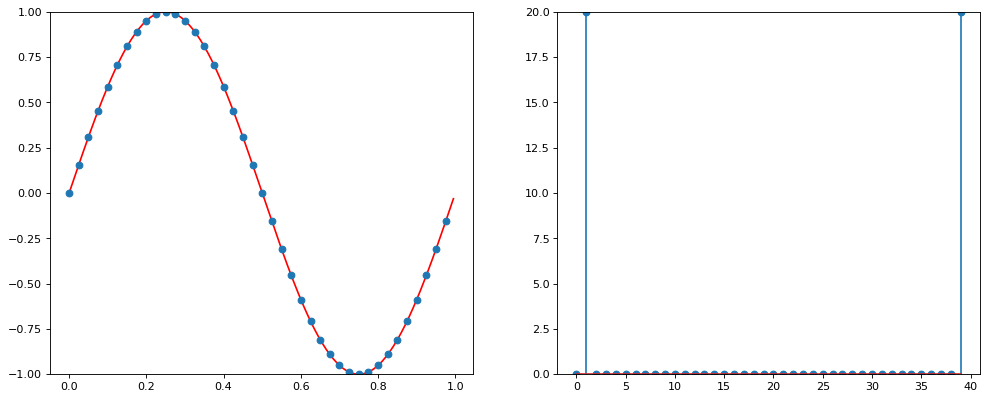

In [125]:
from __future__ import division
from pylab import *
import numpy as np

# Amplituda sygnału
AMPLITUDE = 1.0

# Liczba analizowanych pełnych przebiegów sygnału (okresów)
PERIODS = 1

# częstotliwość probkowania [Hz] sygnału
# (jak często w ciągu sekundy pobieramy informacje o wartości sygnału)
SAMPLING_FREQUENCY = 40

# Okres probkowania [s] (co ile sekund pobieramy próbkę)
SAMPLING_PERIOD = 1.0 / SAMPLING_FREQUENCY

# Czestotliwosc sygnalu [Hz]
SIGNAL_FREQUENCY = 1.0

# Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)
SIGNAL_PERIOD = 1.0 / SIGNAL_FREQUENCY


# generujemy momenty, w których pobieramy próbki
t = np.arange(0, PERIODS * SIGNAL_PERIOD, SAMPLING_PERIOD)

n = len(t)

# def. funkcji (tutaj sinus)
FUNC = lambda x: AMPLITUDE * np.sin(2 * pi * x * SIGNAL_FREQUENCY)

# funkcja sprobkowana
signal = FUNC(t)

fig = plt.figure(figsize = (15, 6), dpi = 80)
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
base_t = np.arange(0, PERIODS * SIGNAL_PERIOD, 1.0 / 200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle = '-', color = 'red')
ax.set_ylim([min(base_signal), max(base_signal)])
## ---
ax.plot(t, signal, 'o')

# sygnal w dziedzinie czestotliwosci
signal1 = np.fft.fft(signal)

# modul sygnalu
signal1 = abs(signal1)

freqs = range(int(n))

ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0, ymax])
else:
    ax.set_ylim([0.0, 3.0])
stem(freqs, signal1, linefmt = '-*')

show()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

In [126]:
from collections.abc import Callable

ContinuousSignal = Callable[[float], float]

class DiscreteSignal:
    def __init__(self, timepoints, values):
        assert len(timepoints) == len(values)

        self.timepoints = timepoints
        self.values = values

    def __str__(self) -> str:
        return "{\n" + "\n".join([f"{x}: {y}" for x, y in zip(self.timepoints, self.values)]) + "\n}"

class Style:
    def __init__(self, linestyle = '-', color = '#0000fa') -> None:
        self.linestyle = linestyle
        self.color = color

In [127]:
def _draw_signal_(ax: Axes, base: DiscreteSignal, sampled: DiscreteSignal, base_style: Style = Style(), sampled_style: Style = Style('o', '#fa0000')):
    MAX = max(base.values)
    MIN = min(base.values)

    margin = (MAX - MIN) * 0.1
    ax.set_ylim(MIN - margin, MAX + margin)

    ax.plot(base.timepoints, base.values, base_style.linestyle, color = base_style.color)
    ax.plot(sampled.timepoints, sampled.values, sampled_style.linestyle, color = sampled_style.color)


def _draw_fft_(ax, signal: DiscreteSignal, linestyle: str):
    MAX = max(signal.values)
    MIN = min(signal.values)

    margin = (MAX - MIN) * 0.1
    ax.set_ylim(MIN - margin, MAX + margin)

    ax.stem(signal.timepoints, signal.values, linefmt = linestyle)


def fft(signal: DiscreteSignal) -> tuple[ndarray, list[int]]:
    fourier = np.abs(np.fft.fft(signal.values)) / 2.0
    fourier[0] /= 2.0
    return (fourier, range(len(signal.timepoints)))

Input vector:
{
0.0: 0.0
0.25: 1.0
0.5: 1.2246467991473532e-16
0.75: -1.0
}
Output vector:
{
0: 3.061616997868383e-17
1: 1.0
2: 6.123233995736766e-17
3: 1.0
}


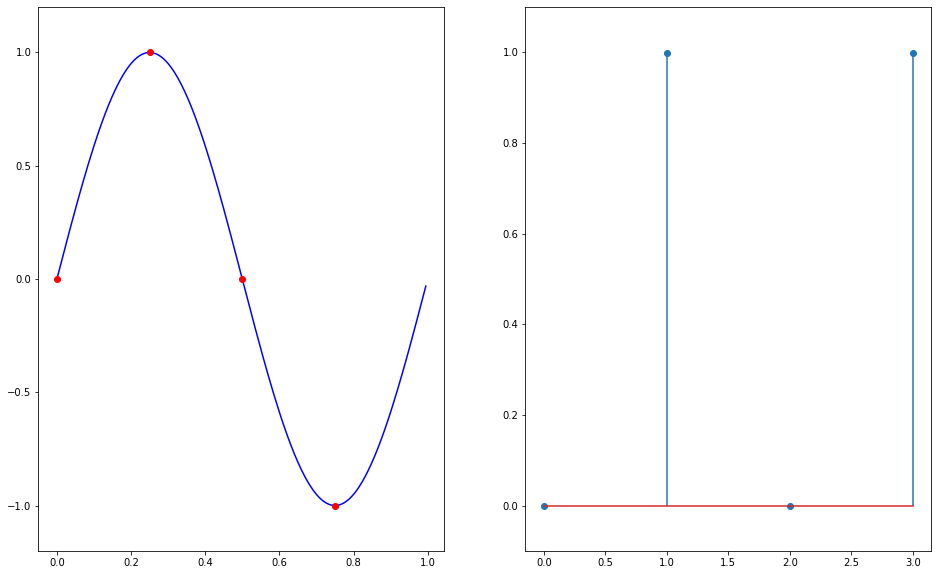

In [128]:
# Function is described as sin(2πf * t + φ), where f is signal frequency and φ is phase offset.
signal = lambda x: np.sin(2 * np.pi * x)

fig = plt.figure(1, figsize = (16, 10))

BASE_FREQENCY = 200.0
SAMPLING_FREQUENCY = 4.0

timepoints = np.arange(0, 1.0, 1.0 / BASE_FREQENCY)
values = signal(timepoints)
base = DiscreteSignal(timepoints, values)

timepoints = np.arange(0, 1.0, 1.0 / SAMPLING_FREQUENCY)
values = signal(timepoints)
sampled = DiscreteSignal(timepoints, values)

values, frequencies = fft(sampled)
fourier = DiscreteSignal(frequencies, values)

base_ax = fig.add_subplot(121)
fft_ax = fig.add_subplot(122)
_draw_signal_(base_ax, base, sampled)
_draw_fft_(fft_ax, fourier, '-*')

print("Input vector:")
print(sampled)
print("Output vector:")
print(fourier)

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [129]:
from ipykernel.pylab.backend_inline import flush_figures
from ipywidgets import interact


def prosta(a = 2, b = 0):
    x = linspace(-5, 5, 100, endpoint = False)  # punkty na osi OX [s]
    f = lambda x: a * x + b
    y = f(x)

    fig = plt.figure(figsize = (6, 3), dpi = 80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)
    flush_figures()


interact(prosta, a = (-5, 5, 0.5), b = (-5, 5, 0.5))


interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

b) Zmień częstotliwość próbkowania na 50Hz.

In [130]:
SAMPLING_FREQUENCY = 50.0

In [131]:
# fft_analyze(analyzed_function = lambda t: np.sin(2 * np.pi * 2 * t), sampling_frequency = SAMPLING_FREQUENCY)
func, freqs = fft(lambda t: np.cos(t), sampling_frequency = 50)
_draw_signal_(fig, 121, )
_draw_signal_(fig, 122, freqs, func, type = 'fft')

TypeError: fft() got an unexpected keyword argument 'sampling_frequency'

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

In [ ]:
# popraw oś OX

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

In [ ]:
# Podpisz osie wykresów

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

In [ ]:
# f=1, A=1, LP=1

In [ ]:
# f=1, A=2, LP=1

In [ ]:
# f=1, A=3, LP=1

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

In [ ]:
# f=1, w=50, LP=1

In [ ]:
# f=1, w=100, LP=1

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

In [ ]:
# popraw oś OY

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

In [ ]:
# f=5, w=20, LP=20

In [ ]:
# f=21, w=20, LP=20

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

In [ ]:
# f=10, w=100, A=1, LP=10

ii) $sin(2*pi*t*f)$, $f=20Hz$

In [ ]:
# f=20, w=100, A=1, LP=10

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

In [ ]:
# f=30, w=100, A=1, LP=10

iv) $sin(2*pi*t*f)$, $f=40Hz$

In [ ]:
# f=40, w=100, A=1, LP=10

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

In [ ]:
# f=50, w=100, A=1, LP=10

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

In [ ]:
# Wyrysuj sygnał

c) Wygenerujemy trochę szumu. Wychodząc z funkcji $sin(2*pi*t*f)$, dodamy do niej 100 losowych sinusów. Wygenerujemy dla nich losowo amplitudy (z [0.02, 0.08], częstotliwosci: [5.0, 10.0] oraz modyfikacje fazy[0 + 2*pi]. Inne parametry: w=20Hz, T=1s. Czy dla powyższych paramerów losowania, jesteś w stanie odnaleźć bazowy przebieg (sin(2*pi*t))? Czy jesteś w stanie zlokalizować szum?

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

In [ ]:
# Wyrysuj sygnał


e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

In [ ]:
# faza = 0


In [ ]:
# faza = pi/4


# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [ ]:
# wygeneruj wektor x


In [ ]:
# oblicz fft z x


In [ ]:
# oblicz ifft

In [ ]:
#porownaj x z ifft(fft(x)), wystarczy print